# Probability Questions 0 (from your excellent TA Morris)

1. How does the estimation procedure called for finding the optimal parameter value(s) of a model given data work? 

define the prior -> compute the likelihood (evaluate how well the modle explains D for given theta ie P(D|theta)) -> update to obtain the posterior using bayes' theorem P(theta|D) -> to find the point estimate of theta, we can use Maximum A Posteriori or Bayesion Integration 

2. What are good working definitions for the likelihood and prior? 

likelihood: joint density of the data given the theta
<!--
    1. The terms "data" and "parameters" or "model" might be useful in the likelihood definition
    2. The terms "probability" or "belief" might be useful in the prior definition
-->
3. What does introducing a prior mean in terms of choosing a model and its parameters?
we're gonna choose a prior to match our likelihood. the data model is a function of the parameters. think about what priors match the parameters. 
4. What is "certainty" or "level of belief" in how do you express it?
smaller variance -> higher certainty




# Probability Questions 1

---

1. Estimate $\Pr(a \leq X \leq b)$ for $X \sim \textrm{beta}(\alpha,\beta)$ by sampling from a beta distribution 

$$
\Pr(a \leq X \leq b) = \int_{-\infty}^{\infty} \mathbf{1}_{[a, b]}(x) f(x) \, dx = \mathbb{E}[\mathbf{1}_{[a, b]}(X)]
\approx \frac{1}{n} \sum_{i=1}^n \mathbf{1}_{[a, b]}(X_i)
$$

integrate -inf to inf of the indicator function of x (a to b)*f(x)dx
= E[I_[a,b](x)]

2. Express this statement as an expectation with $f(x)$ the beta density in question 


Estimated Pr(0.7 <= X <= 0.9) for Beta(3, 2): 0.296711
Standard Error: 0.000457
CDF Pr(0.7 <= X <= 0.9) for Beta(3, 2): 0.296000


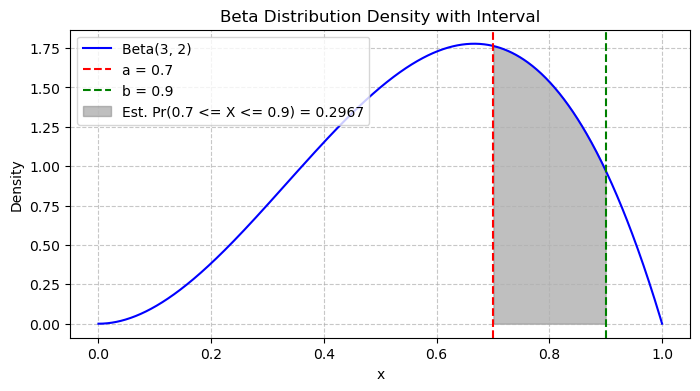

In [39]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

alpha_param,beta_param = 3,2
parameter_domain = np.linspace(0,1,1000)
beta_prior = stats.beta(a=alpha_param,b=beta_param)

a,b = 0.7,0.9

def estimate_probability(a, b, beta, n=1000000):
    samples = beta.rvs(size=n)
    probability = np.mean((samples >= a) & (samples <= b))
    return probability, (((samples >= a) & (samples <= b))).std()/n**0.5

estimated_prob, std_error = estimate_probability(a, b, beta_prior)
cdf_prob = beta_prior.cdf(b)-beta_prior.cdf(a)
print(f"Estimated Pr({a} <= X <= {b}) for Beta({alpha_param}, {beta_param}): {estimated_prob:.6f}")
print(f"Standard Error: {std_error:.6f}")
print(f"CDF Pr({a} <= X <= {b}) for Beta({alpha_param}, {beta_param}): {cdf_prob:.6f}")

plt.figure(figsize=(8, 4))
plt.plot(parameter_domain, beta_prior.pdf(parameter_domain), label=f'Beta({alpha_param}, {beta_param})', color='blue')
plt.axvline(a, color='red', linestyle='--', label=f'a = {a}')
plt.axvline(b, color='green', linestyle='--', label=f'b = {b}')
plt.fill_between(parameter_domain, 0, beta_prior.pdf(parameter_domain), 
                 where=(parameter_domain >= a) & (parameter_domain <= b), color='gray', alpha=0.5,
                 label=f'Est. Pr({a} <= X <= {b}) = {estimated_prob:.4f}')
plt.title("Beta Distribution Density with Interval")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


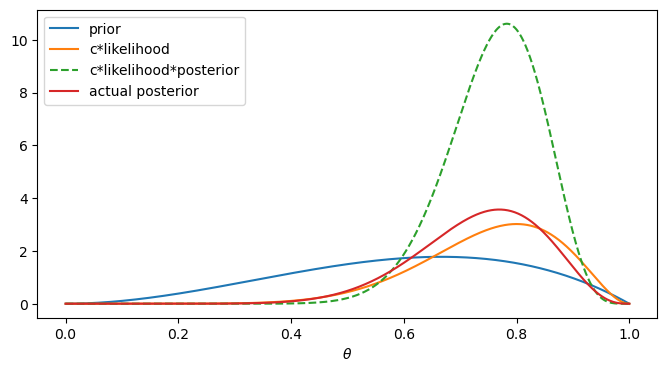

In [40]:
n, x = 10, 8
likelihood = lambda theta: stats.binom(n=n, p=theta).pmf(x)

c = 10
posterior = stats.beta(a=alpha_param+x, b=beta_param+n-x)

plt.figure(figsize=(8,4))
plt.xlabel('$\\theta$')
plt.plot(parameter_domain, beta_prior.pdf(parameter_domain), label='prior')
plt.plot(parameter_domain, c*likelihood(parameter_domain), label='c*likelihood')
plt.plot(parameter_domain, c*likelihood(parameter_domain)*posterior.pdf(parameter_domain), label='c*likelihood*posterior', linestyle='--')
plt.plot(parameter_domain, posterior.pdf(parameter_domain), label='actual posterior')
plt.legend()
plt.show()


## Monte Carlo Integration
### All Bayesian estimates are just Monte Carlo Integration...

$$
\Large
\begin{align*}
\Pr(a\leq X\leq b)  {} = & \int_a^b f(x) dx \\
{} = & \int 1_{[a,b]}(x) f(x) dx = \mathrm{I\!E}[1_{[a,b]}(x_i)]\\
& \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;\;\;\approx \frac{1}{n} \sum_{i=1}^n 1_{[a,b]}(x_i)
\end{align*}
$$


In [30]:
print((beta_prior.rvs(m)<a).std()/m**0.5)
print((beta_prior.rvs(m)<b).std()/m**0.5)


0.004991524716957736
0.002734484229246898


# Diversion 1: Likelihoods

---


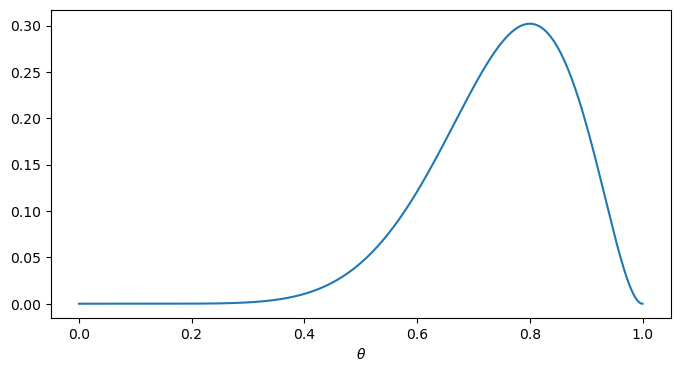

In [2]:
n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda theta: stats.binom.pmf(n=n, k=x, p=theta)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, likelihood(parameter_domain));

# Diversion 2: Posteriors

---

$$
\Large
\begin{align*}
\overset{posterior}{p(\theta|x)} &={} \frac{\overset{likelihood}{p(x|\theta)}\times \overset{prior}{p(\theta)}}{\overset{\text{evidence}}{p(x)}}\\
\end{align*}
$$

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**


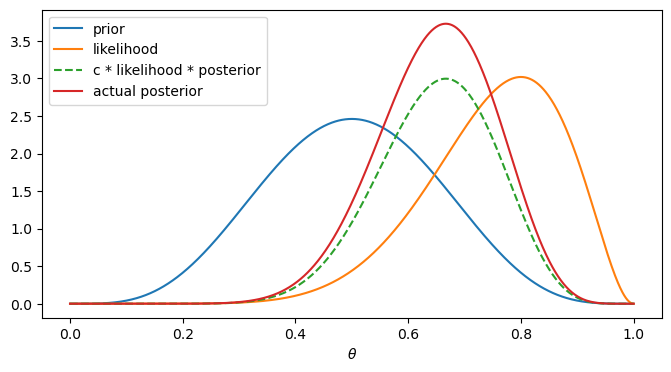

In [3]:
plt.figure(figsize=(8,4))

alpha,beta = 5,5; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

plt.plot(parameter_domain, prior.pdf(parameter_domain), 
         label='prior')

n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda p: stats.binom.pmf(n=n, k=x, p=p)

c = 10
plt.plot(parameter_domain, c*likelihood(parameter_domain),
         label='likelihood')
plt.plot(parameter_domain, 
         c*likelihood(parameter_domain)*prior.pdf(parameter_domain),
         label='c * likelihood * posterior', linestyle="--")

posterior = stats.beta(a=alpha+x,b=beta+n-x)

plt.plot(parameter_domain, posterior.pdf(parameter_domain), 
         label='actual posterior')

plt.legend(); plt.xlabel('$\\theta$');

# Probability Questions 2

---

1. Estimate $\Pr(a \leq p \leq b | x)$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ based on sampling 
2. What values for $a$ and $b$ solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$?
3. What is your best guess of the values for $a$ and $b$ that solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ if you only have a sample from the beta distribution?


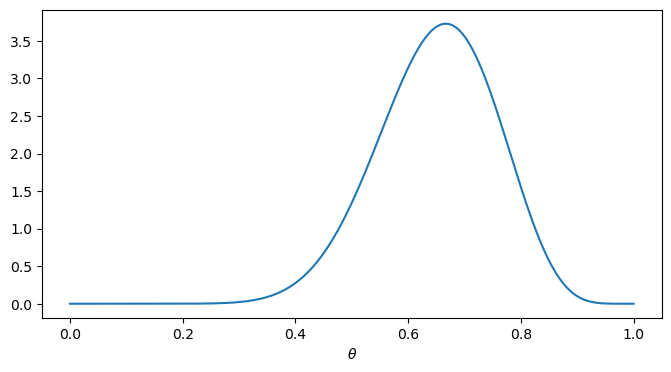

In [4]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
posterior = stats.beta(a=alpha+x, b=beta+n-x)
plt.plot(parameter_domain, posterior.pdf(parameter_domain));


In [8]:
posterior_m = posterior.rvs(m)
sorted(posterior_m)[int(m/40)], sorted(posterior_m)[-int(m/40)]


(0.4337071605974434, 0.8361063962515201)

## Bayesian Credible Interval
$$\Large
\begin{align*}
\underset{\text{e.g., $\alpha=0.05$}}{(1-\alpha)} &\approx{} \int_a^b  p(\theta|x) d\theta \\ & {} \quad \quad  \text{ for } \quad \underset{\text{where $\theta_{(k)}$ is the $k^{th}$ rank ordered posterior sample}}{a=\theta_{\left(\left\lfloor m\times\frac{\alpha}{2}\right\rfloor\right)} \text{ and } b=\theta_{\left(\left\lceil m\times(1-\frac{\alpha}{2})\right\rceil\right)}}
\end{align*}
$$

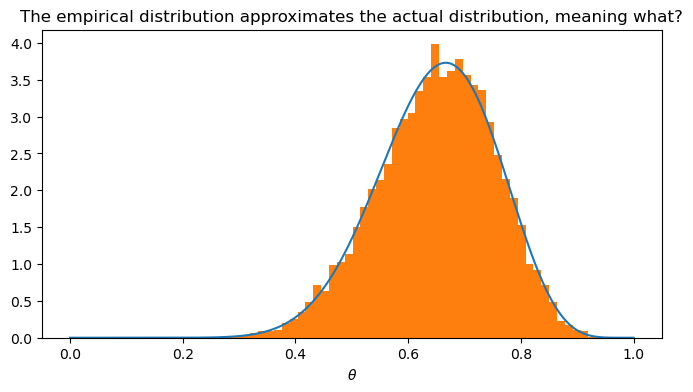

In [9]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.title("The empirical distribution approximates the actual distribution, meaning what?")
plt.plot(parameter_domain, posterior.pdf(parameter_domain));
hist = plt.hist(posterior_m, bins=50, density=True)

#plt.vlines([sorted(posterior_m)[int(m/40)],
#            sorted(posterior_m)[-int(m/40)]],0,hist[0].max()); 

5. What does the fact that the empirical distribution approximates the actual distribution allow us to do?
6. Why might this be useful?
7. How is this different than calculating probabilities?
8. Why is Bayesian inference different from Frequentist inference?


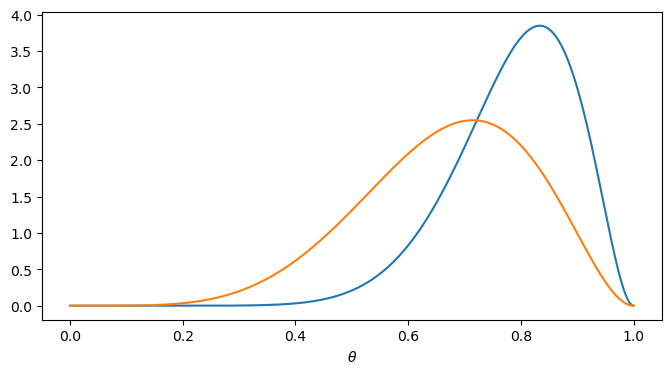

In [10]:
alpha,beta = 3,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

n1,x1 = 10,8  
posterior1 = stats.beta(a=alpha+x1,b=beta+n1-x1)
n2,x2 = 5,3  
posterior2 = stats.beta(a=alpha+x2,b=beta+n2-x2)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, posterior1.pdf(parameter_domain))
plt.plot(parameter_domain, posterior2.pdf(parameter_domain));


9. What is $\Pr(\theta_1<\theta_2|x1,x2) = \int\int 1_{\theta_1 < \theta_2}(\theta_1, \theta_2) p(\theta_1|x1)p(\theta_2|x2) d \theta_1 d \theta_2$?
10. What is the chance that a single sample $\theta_1^{(m)}$ is less than another single sample $\theta_2^{(m)}$?
11. What is the density $f(\theta_1 \div \theta_2)$

# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

===== Analysis 1: Independent Beta-Binomial =====
Arm picks:    [  9  93 898]
Final alpha:  [  4.  65. 717.]
Final beta:   [  7.  30. 183.]
Mean Reward:  0.783

===== Analysis 2: Single Dirichlet-Multinomial =====
Dirichlet parameters: [  4.  65. 717.]
Posterior mean (p1, p2, p3): [0.00508906 0.0826972  0.91221374]

If each arm truly has its own independant success/failure process, then Beta-Binomial is correct since it treats each arm's success probability as an independent Bernoullie process.
On the other hand, Dirichlet-Multinomial treats which arm is chosen as a single categorical outcome with probabilities that must sum to 1.
For e.g. if we are testing 3 diff. versions of a website, and each user is assigned one of the three arms, use Beta-Binomial. If the user has a choice of which arm to use, use Dirichlet-Multinomial.


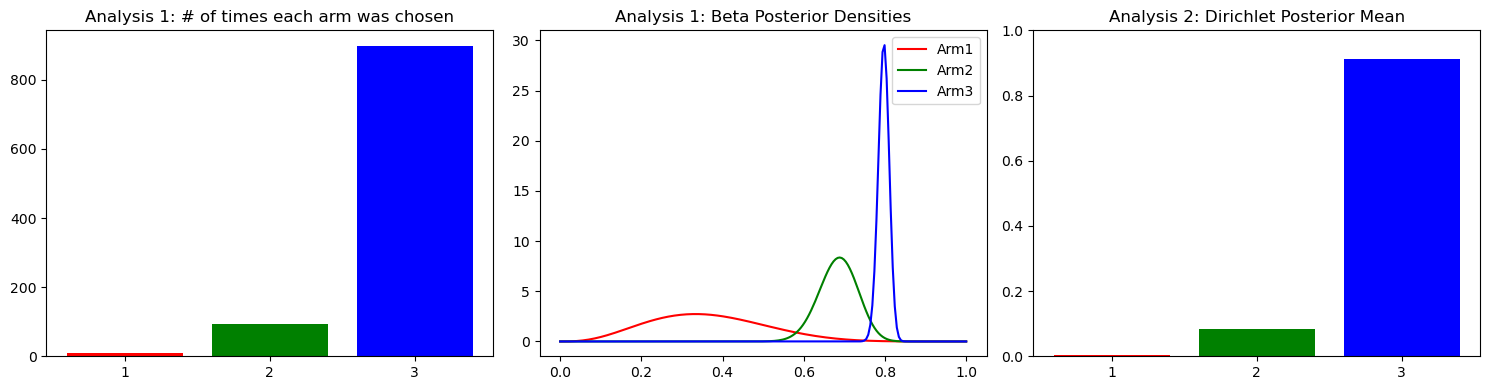

In [17]:
#Q3
from scipy import stats

theta_true = np.array([0.3, 0.6, 0.8])
T = 1000

alpha_bb = np.ones(3)
beta_bb = np.ones(3)

chosen_arm_history = []
reward_history = []

for t in range(T):
    samples = np.random.beta(alpha_bb, beta_bb)
    chosen_arm = np.argmax(samples)
    chosen_arm_history.append(chosen_arm)
    reward = 1 if (np.random.rand() < theta_true[chosen_arm]) else 0
    reward_history.append(reward)
    alpha_bb[chosen_arm] += reward
    beta_bb[chosen_arm] += 1 - reward

chosen_arm_history = np.array(chosen_arm_history)
reward_history = np.array(reward_history)
counts = np.bincount(chosen_arm_history, minlength=3)
mean_reward = reward_history.mean()
print("===== Analysis 1: Independent Beta-Binomial =====")
print(f"Arm picks:    {counts}")
print(f"Final alpha:  {alpha_bb}")
print(f"Final beta:   {beta_bb}")
print(f"Mean Reward:  {mean_reward:.3f}")

dirichlet_alpha = np.ones(3)

for t in range(T):
    arm = chosen_arm_history[t]
    r = reward_history[t]
    if r ==1:
        dirichlet_alpha[arm] += 1

print("\n===== Analysis 2: Single Dirichlet-Multinomial =====")
print(f"Dirichlet parameters: {dirichlet_alpha}")
dirichlet_mean = dirichlet_alpha / dirichlet_alpha.sum()
print(f"Posterior mean (p1, p2, p3): {dirichlet_mean}")

print("\nIf each arm truly has its own independant success/failure process, then Beta-Binomial is correct since it treats each arm's success probability as an independent Bernoullie process.")
print("On the other hand, Dirichlet-Multinomial treats which arm is chosen as a single categorical outcome with probabilities that must sum to 1.")
print("For e.g. if we are testing 3 diff. versions of a website, and each user is independently assigned one of the three arms, use Beta-Binomial. If the user has a choice of which arm to use, use Dirichlet-Multinomial.")
fig, ax = plt.subplots(1,3, figsize=(15,4))

# 1. Number of times each arm was chosen
ax[0].bar([1,2,3], counts, color=['red','green','blue'])
ax[0].set_xticks([1,2,3])
ax[0].set_title("Analysis 1: # of times each arm was chosen")

# 2. Beta posteriors from Analysis 1
grid = np.linspace(0,1,200)
for j, col in zip(range(3), ['red','green','blue']):
    pdf_j = stats.beta.pdf(grid, alpha_bb[j], beta_bb[j])
    ax[1].plot(grid, pdf_j, color=col, label=f"Arm{j+1}")
ax[1].set_title("Analysis 1: Beta Posterior Densities")
ax[1].legend()

# 3. Dirichlet posterior from Analysis 2 (visualize a few 2D slices or bar plot)
# For quick illustration, just show the posterior *mean*:
ax[2].bar([1,2,3], dirichlet_mean, color=['red','green','blue'])
ax[2].set_xticks([1,2,3])
ax[2].set_ylim(0,1)
ax[2].set_title("Analysis 2: Dirichlet Posterior Mean")

plt.tight_layout()
plt.show()

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data